**Training and Visualizing a Decision Tree**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Gambar 6-1. Iris Decision Tree

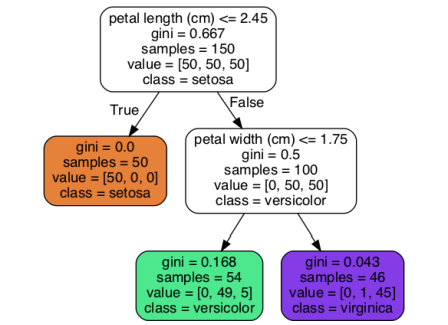

**Making Predictions**

Gambar 6-2. Decision Tree Decision boundaries


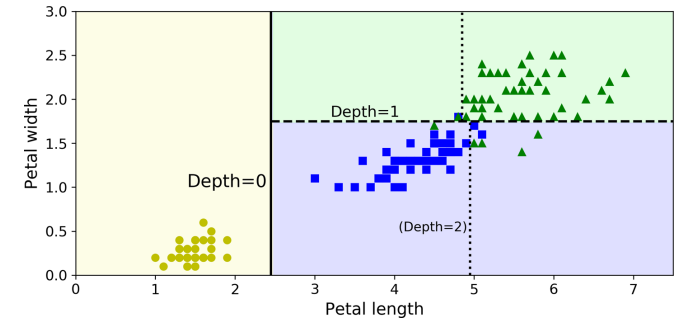

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

**Regularization Hyperparameters**

Gambar 6-3 Regularization menggunakan min_samples_leaf

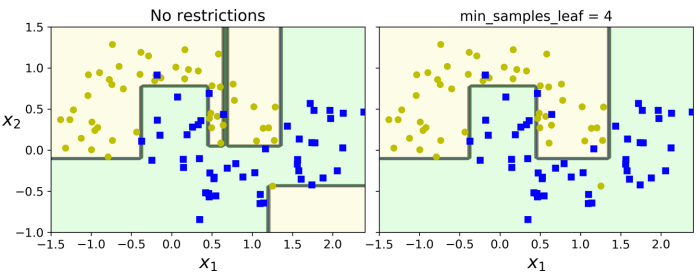

menunjukkan dua Pohon Keputusan yang dilatih pada dataset bulan (diperkenalkan dalam
Bab 5). Di sebelah kiri, Pohon Keputusan dilatih dengan hiperparameter default
(yaitu, tanpa batasan), dan di sebelah kanan dilatih dengan min_samples_leaf=4. Sangat
jelas bahwa model di sebelah kiri terlalu pas, dan model di sebelah kanan
mungkin akan menggeneralisasi lebih baik.

**Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

Gambar 6-4 Decision tree untuk regresi

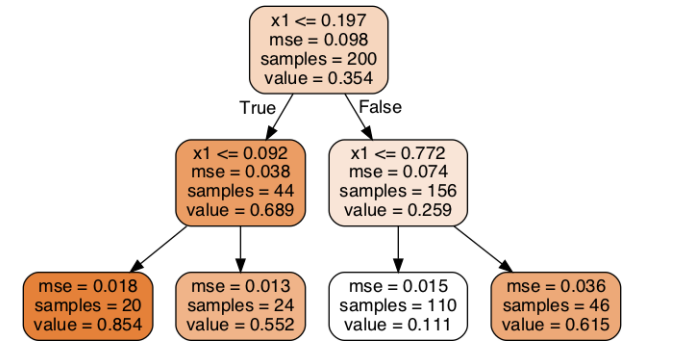

Pohon ini tampak sangat mirip dengan pohon klasifikasi yang Anda buat sebelumnya. Perbedaan utamanya adalah bahwa pohon ini tidak memprediksi kelas di setiap simpul, tetapi memprediksi nilai. Misalnya, Anda ingin membuat prediksi untuk instans baru dengan x1 = 0,6. Anda menelusuri pohon mulai dari akar, dan akhirnya mencapai simpul daun yang memprediksi nilai = 0,111. Prediksi ini adalah nilai target rata-rata dari 110 instans pelatihan yang terkait dengan simpul daun ini, dan menghasilkan kesalahan kuadrat rata-rata sebesar 0,015 atas 110 instans ini. Prediksi model ini direpresentasikan di sebelah kiri pada Gambar 6-5. Jika Anda menetapkan max_depth = 3, Anda mendapatkan prediksi yang direpresentasikan di sebelah kanan. Perhatikan bagaimana nilai yang diprediksi untuk setiap wilayah selalu merupakan nilai target rata-rata instans di wilayah tersebut. Algoritme membagi setiap wilayah dengan cara yang membuat sebagian besar instans pelatihan sedekat mungkin dengan nilai yang diprediksi tersebut.

Gambar 6-5 Prediksi dari 2 Decision tree model regresi

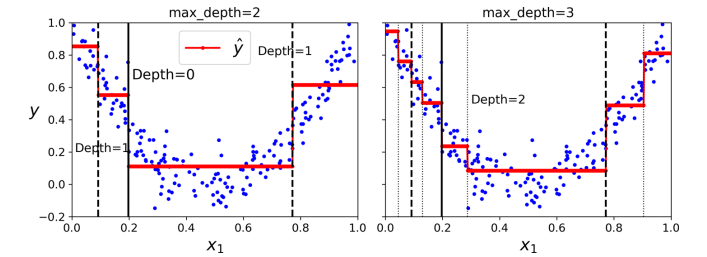

Sama seperti tugas klasifikasi, Pohon Keputusan rentan terhadap overfitting saat menangani tugas regresi. Tanpa regularisasi apa pun (misalnya, menggunakan hiperparameter default), Anda mendapatkan prediksi di sebelah kiri pada Gambar 6-6. Prediksi ini jelas melakukan overfitting pada set pelatihan dengan sangat buruk. Hanya dengan menetapkan min_samples_leaf=10 akan menghasilkan model yang jauh lebih masuk akal, yang direpresentasikan di sebelah kanan pada Gambar 6-6.


Gambar 6-6 Regularisasi sebuah regresi decisition tree
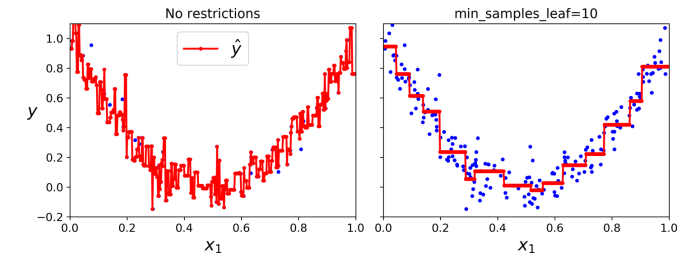

**Instability**

Mudah-mudahan sekarang Anda yakin bahwa Pohon Keputusan memiliki banyak kelebihan:
Pohon Keputusan mudah dipahami dan ditafsirkan, mudah digunakan, serbaguna, dan canggih.
Namun, Pohon Keputusan memiliki beberapa keterbatasan. Pertama, seperti yang mungkin telah Anda perhatikan,
Pohon Keputusan menyukai batas keputusan ortogonal (semua pemisahan tegak lurus terhadap sumbu),
yang membuatnya sensitif terhadap rotasi set pelatihan. Misalnya, Gambar 6-7 menunjukkan
set data yang dapat dipisahkan secara linier: di sebelah kiri, Pohon Keputusan dapat membaginya dengan mudah, sementara
di sebelah kanan, setelah set data diputar 45°, batas keputusan tampak berbelit-belit. Meskipun kedua Pohon Keputusan sangat cocok dengan set pelatihan, sangat mungkin model di sebelah kanan tidak akan tergeneralisasi dengan baik. Salah satu cara untuk membatasi masalah ini adalah dengan menggunakan Analisis Komponen Utama (lihat Bab 8), yang sering kali menghasilkan orientasi data pelatihan yang lebih baik.


Gambar 6-7 Sensivitas untuk training set rotasi
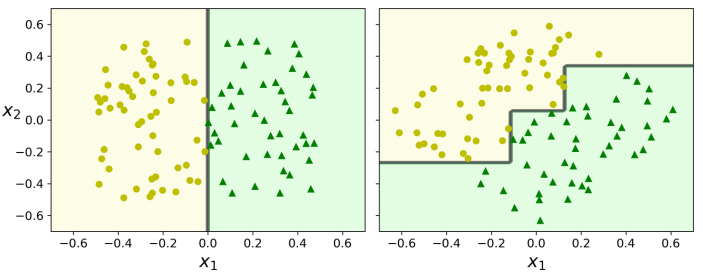

Secara umum, masalah utama dengan Pohon Keputusan adalah bahwa pohon tersebut sangat sensitif terhadap
variasi kecil dalam data pelatihan. Misalnya, jika Anda hanya menghapus Iris
versicolor terlebar dari set pelatihan iris (yang memiliki kelopak sepanjang 4,8 cm dan lebar 1,8 cm)
dan melatih Pohon Keputusan baru, Anda mungkin mendapatkan model yang direpresentasikan dalam Gambar 6-8. Seperti yang Anda lihat, model tersebut tampak sangat berbeda dari Pohon Keputusan sebelumnya (Gambar 6-2).
Sebenarnya, karena algoritme pelatihan yang digunakan oleh Scikit-Learn bersifat stokastik,6 Anda mungkin
mendapatkan model yang sangat berbeda bahkan pada data pelatihan yang sama (kecuali jika Anda menetapkan hiperparameter
random_state).

Gambar 6-8. Sensitivitas terhadap detail set pelatihan
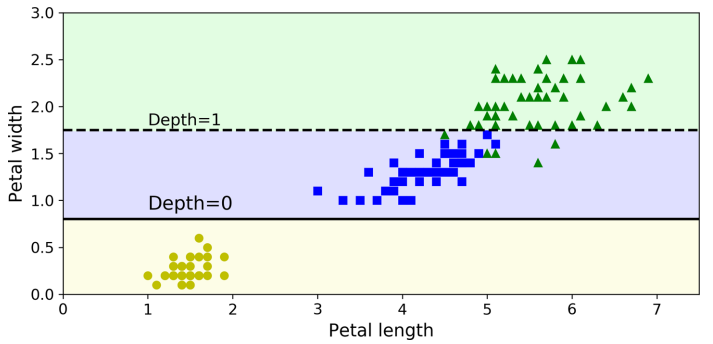